In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\.MY PERSONAL DATA/programming Practice/Data Analytics/Elevvo Pathways Projects/Time Series Breakdown of Retail Sales/csv files/train.csv')
stores = pd.read_csv('D:\.MY PERSONAL DATA/programming Practice/Data Analytics/Elevvo Pathways Projects/Time Series Breakdown of Retail Sales/csv files/stores.csv')


df = df.merge(stores, on='Store', how='left')

In [3]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,02/05/2010,24924.50,False,A,151315
1,1,1,02/12/2010,46039.49,True,A,151315
2,1,1,02/19/2010,41595.55,False,A,151315
3,1,1,02/26/2010,19403.54,False,A,151315
4,1,1,03/05/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,09/28/2012,508.37,False,B,118221
421566,45,98,10/05/2012,628.10,False,B,118221
421567,45,98,10/12/2012,1061.02,False,B,118221
421568,45,98,10/19/2012,760.01,False,B,118221


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [6]:
# for Monthly_Sales 
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month').Weekly_Sales.sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()


# For Moving Average
monthly_sales['Moving_Avg'] = monthly_sales['Weekly_Sales'].rolling(window=3, center=True).mean()

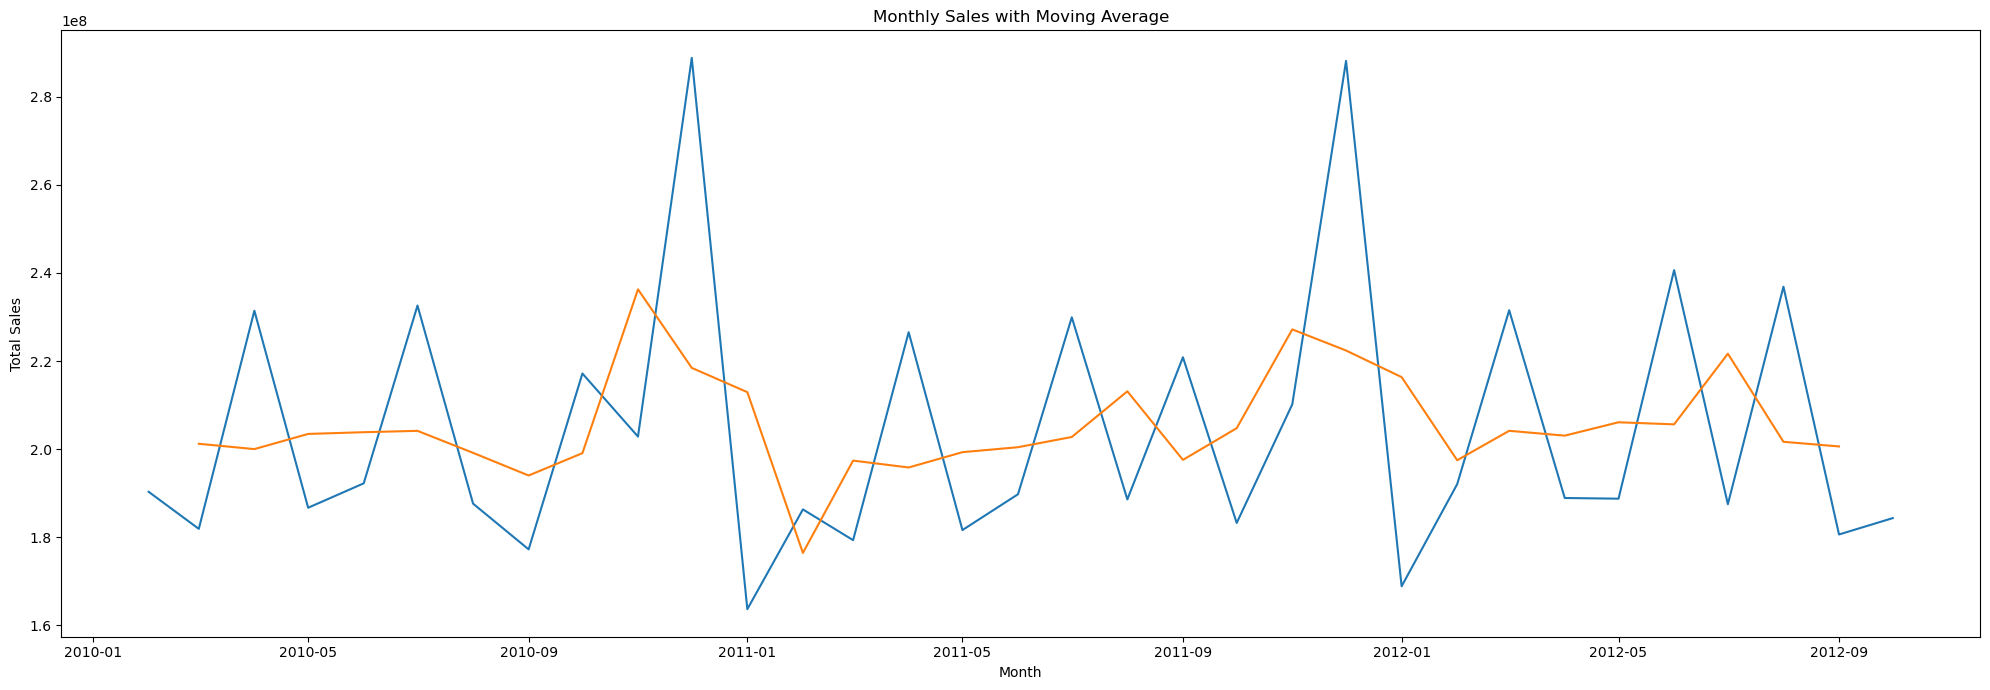

In [ ]:
# Plotting the monthly Sales
plt.figure(figsize=(20, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales',markers='o')
sns.lineplot(data=monthly_sales, x='Month', y='Moving_Avg',markers='o')
plt.title('Monthly Sales with Moving Average')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

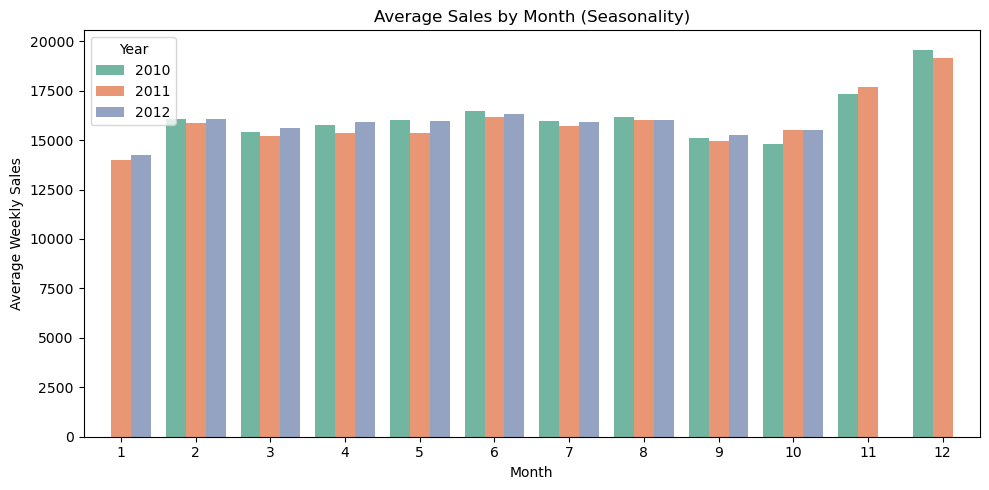

In [8]:
# plotting for Seasonal Patterns

df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month
seasonal = df.groupby(['Month_Num', 'Year'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=seasonal, x='Month_Num', y='Weekly_Sales', palette='Set2', hue='Year')
plt.title('Average Sales by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

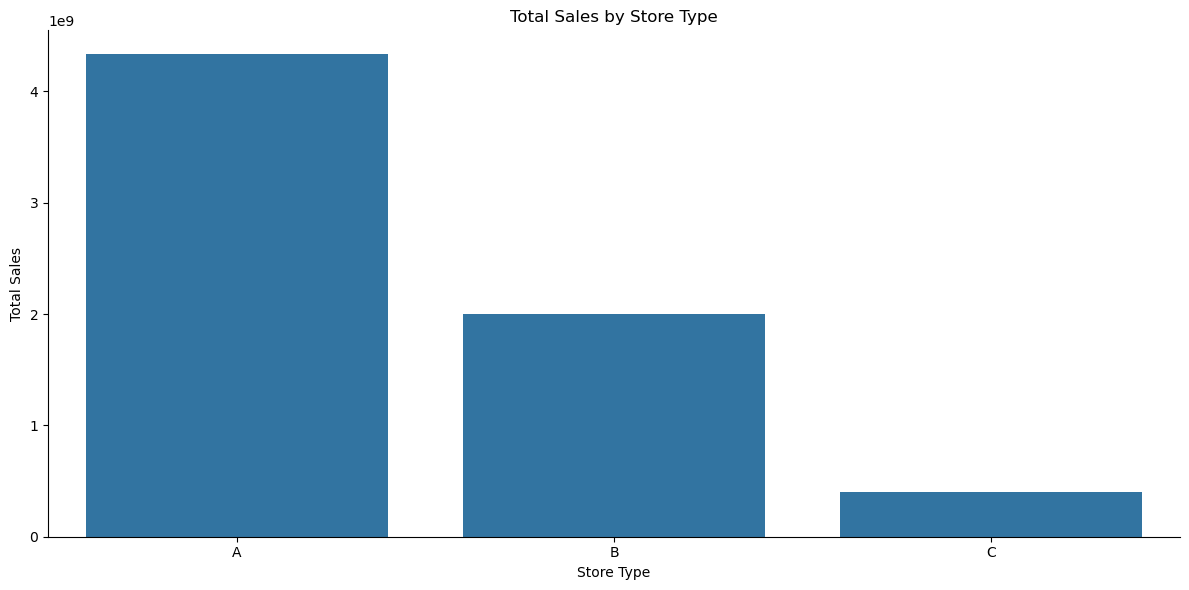

In [19]:
#plotting for total sales by store type
region_sales = df.groupby('Type')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='Type', y='Weekly_Sales')
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
sns.despine()
plt.tight_layout()
plt.show()

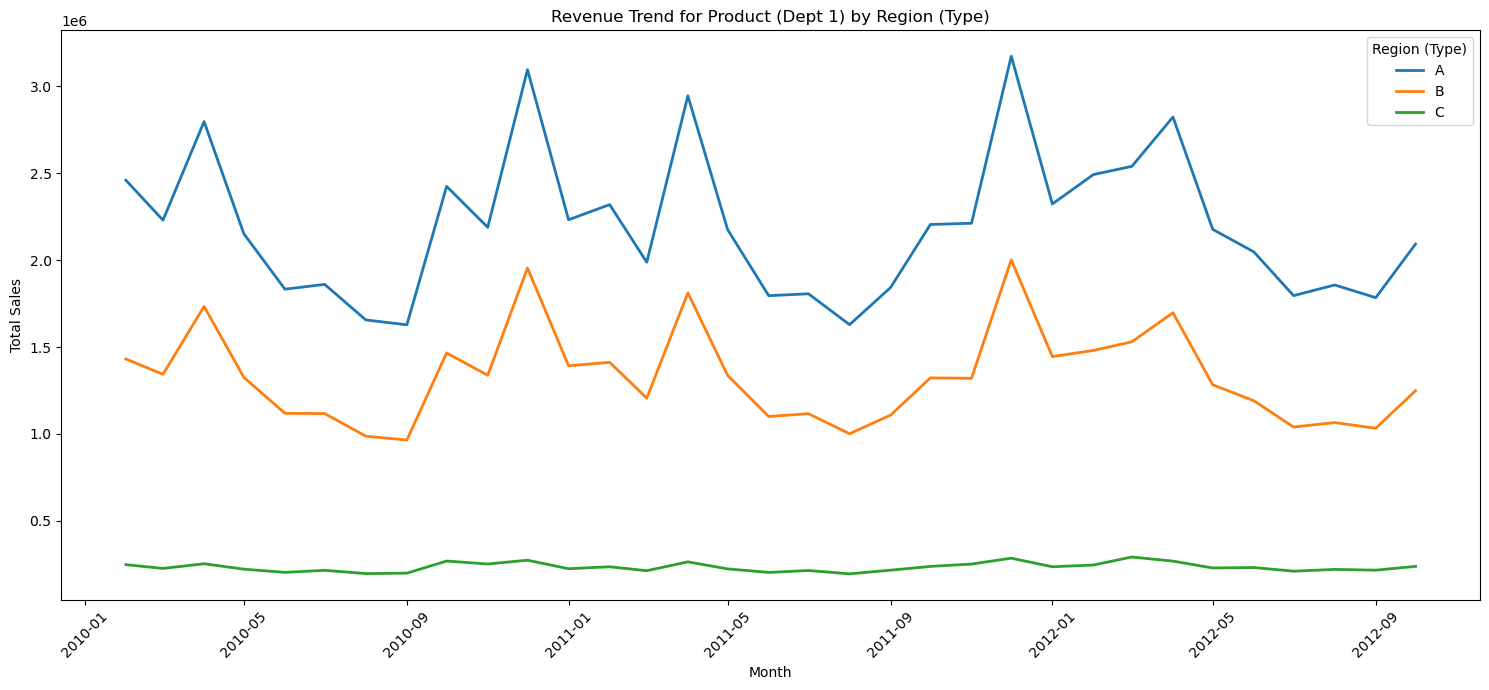

In [47]:
# Add a 'Month' column for grouping
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Group by Month, Dept (product), and Type (region)
breakdown = df.groupby(['Month', 'Dept', 'Type'])['Weekly_Sales'].sum().reset_index()

# Choose a specific Dept to analyze (e.g., Dept 1)

dept_id = 1 
trend_data = breakdown[breakdown['Dept'] == dept_id].copy()

# Sort by Month for correct plotting and moving average
trend_data = trend_data.sort_values('Month')

# Add a moving average for each region (Type)
trend_data['exp_smooth'] = trend_data.groupby('Type')['Weekly_Sales'].transform(lambda x: x.ewm(span=3, adjust=False).mean())


plt.figure(figsize=(15, 7))
sns.lineplot(data=trend_data, x='Month', y='exp_smooth', hue='Type', linewidth=2)
plt.title(f'Revenue Trend for Product (Dept {dept_id}) by Region (Type)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region (Type)')
plt.tight_layout()
plt.show()